**1. Define the goal:**<br/><br/>

Develop a predictive model that can estimate the price of housing based on various characteristics of the properties, such as size, location, year of construction...

This model will help potential buyers, sellers or investors make informed decisions.

**2. Get the data:**<br/><br/>
This project will use a dataset such as California home prices, which is available directly on skicit-learn.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

california_ds = pd.DataFrame(california.data, columns = california.feature_names)
california_ds['MedHouseValue'] = pd.Series(california.target)

california_ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
california_ds.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**3. Clean data:**<br/><br/>
<ul>
    - Verify and treat missing values: Eliminate or impute outliers based on some statistical criteria.
</ul>

In [3]:
# Checking for missing NaN values
print(california_ds.isnull().sum())

# Option 1: impute with mean (for continuous variables)
# california_ds.fillna(california_ds.mean(), inplace = True)

# Option 2: Removing rows with missing values
california_ds.dropna(inplace = True)

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


**4. EDA (Exploratory Data Analysis):**

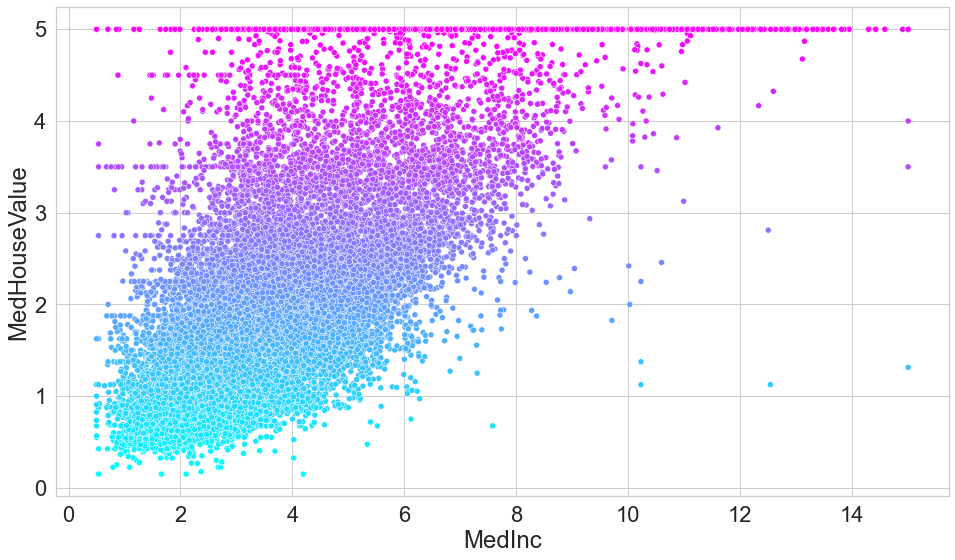

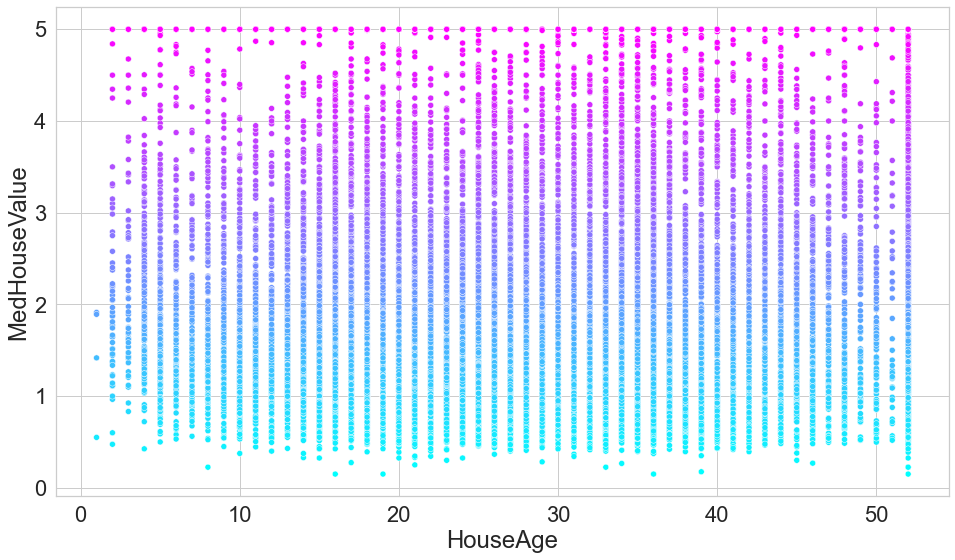

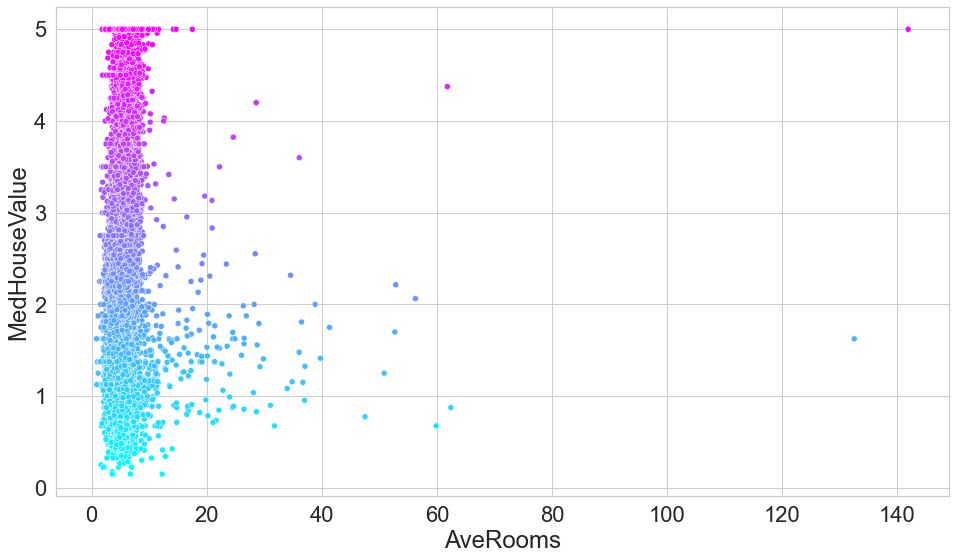

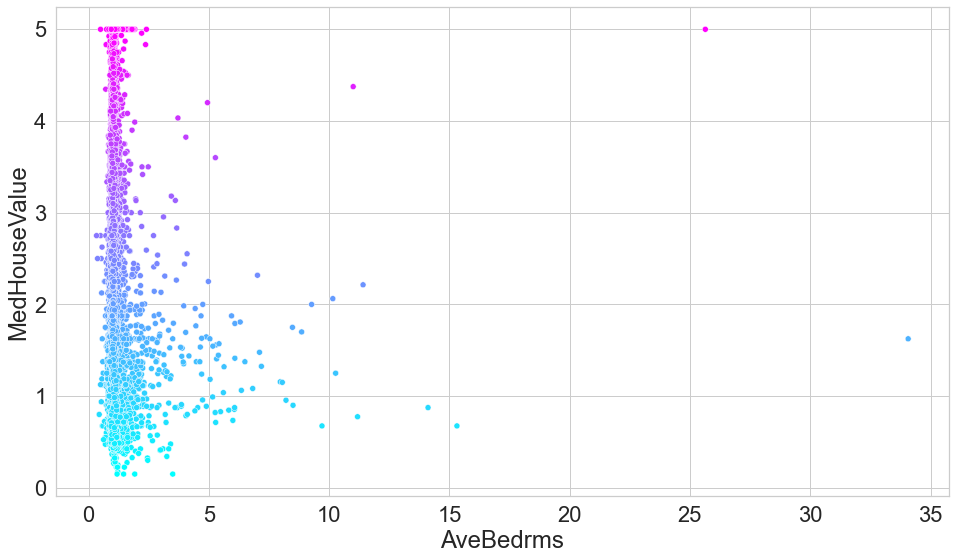

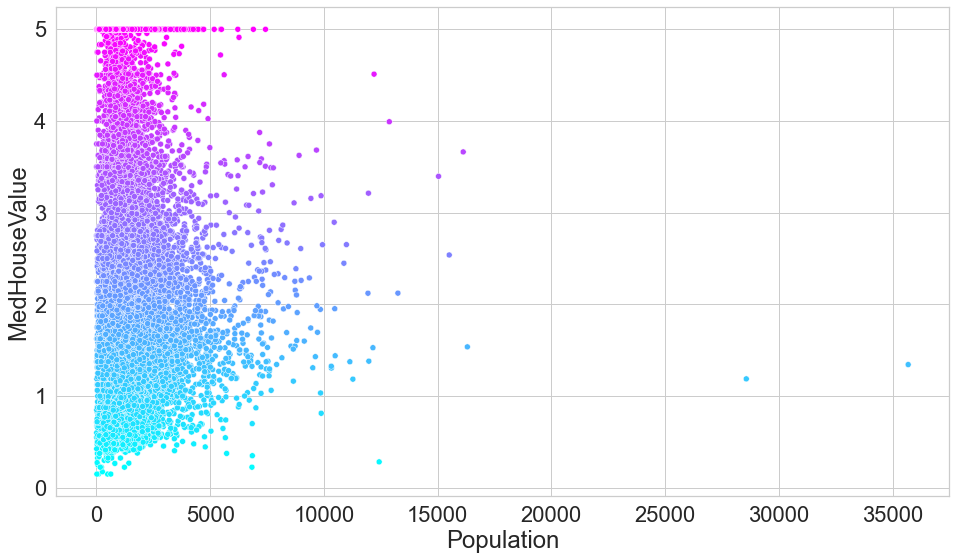

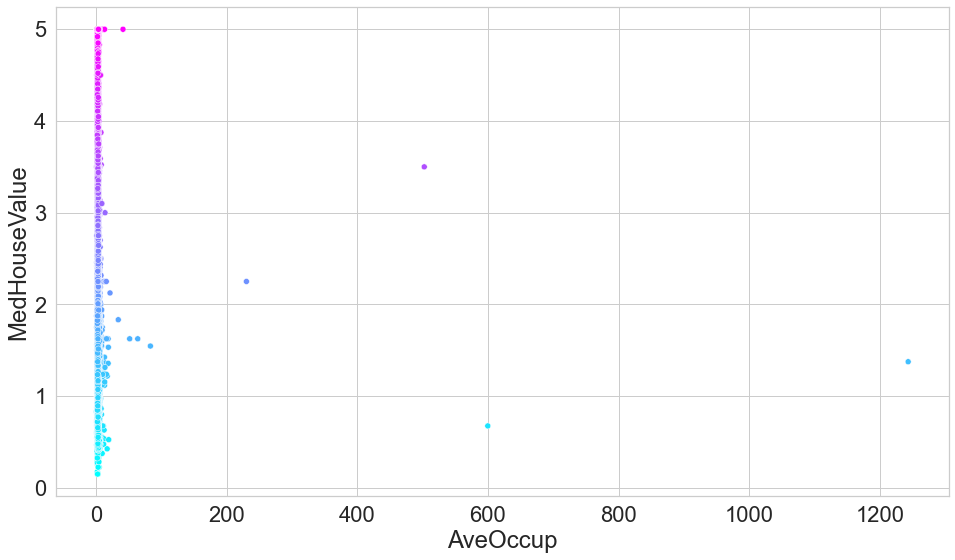

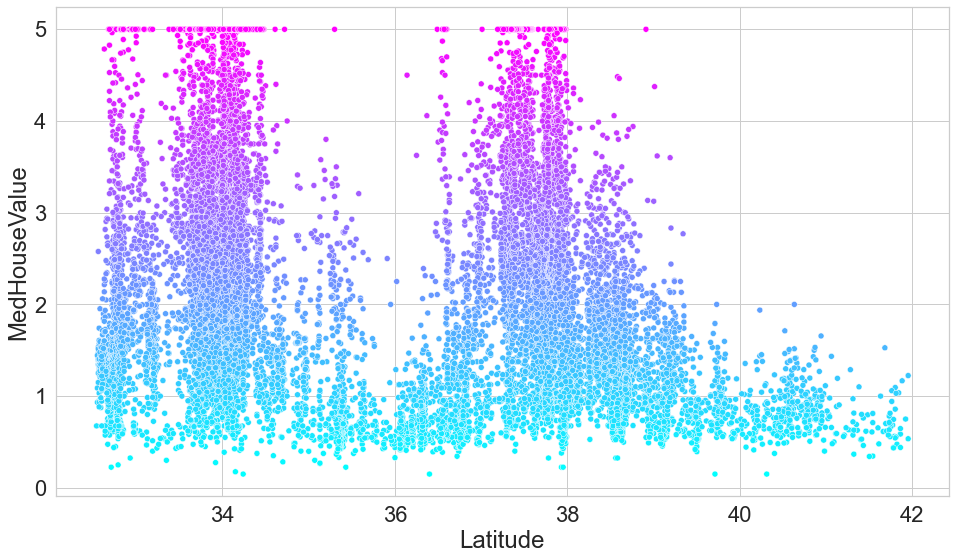

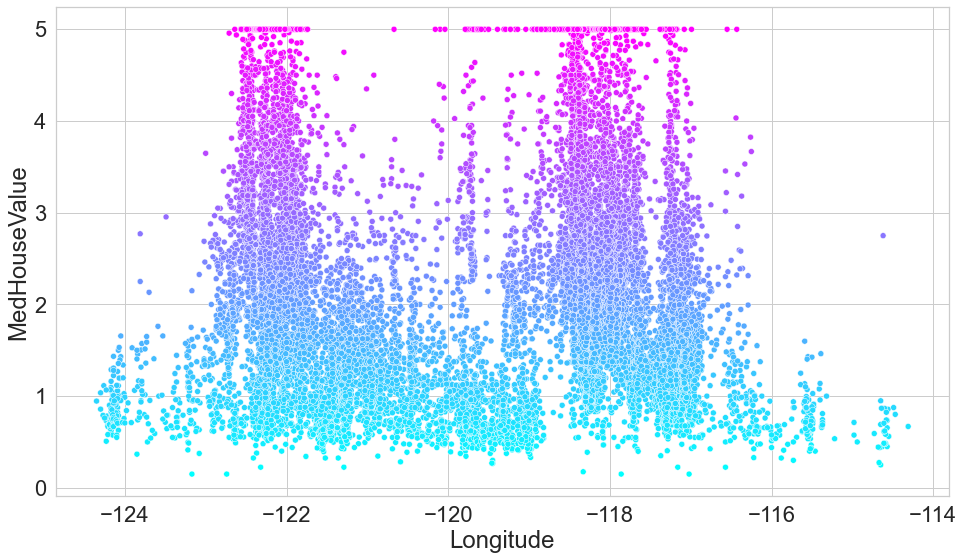

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2)
sns.set_style('whitegrid')

for feature in california.feature_names:
    plt.figure(figsize = (16,9))
    sns.scatterplot(data = california_ds, x = feature, y = 'MedHouseValue', hue = 'MedHouseValue', palette = 'cool', legend = False)

**5. Feature Engineering:**

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization (StandardScaler)
scaler = StandardScaler()
ds_scaled = california_ds.copy()
ds_scaled[california_ds.columns] = scaler.fit_transform(california_ds[california_ds.columns])

# Normalization (MinMaxScaler)
min_max_scaler = MinMaxScaler()
ds_min_max_scaled = california_ds.copy()
ds_min_max_scaled[california_ds.columns] = min_max_scaler.fit_transform(california_ds[california_ds.columns])

ds_min_max_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**6. Feature Selection:**

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Suppose: ds is the dataset and 'PRICE' is target variable
x = ds_min_max_scaled.drop('MedHouseValue', axis = 1)
y = ds_min_max_scaled['MedHouseValue']

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 10) # Select the 10 most important features
x_rfe = rfe.fit_transform(x, y)
model.fit(x_rfe, y)

selected_features = pd.Series(rfe.support_, index = x.columns)
print(selected_features[selected_features == True].index)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


**7. Selection and training ML:**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f'{name} MSE:', (y_test, predictions))

Linear Regression MSE: (20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: MedHouseValue, Length: 4128, dtype: float64, array([0.11734649, 0.33278761, 0.52776459, ..., 0.89046647, 0.21392101,
       0.38338244]))
Decision Tree MSE: (20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: MedHouseValue, Length: 4128, dtype: float64, array([0.05587812, 0.21711457, 1.        , ..., 1.        , 0.10288824,
       0.41690756]))
Random Forest MSE: (20046    0.067424
3024     0.063507
15663    1.000000
20484    0.419794
9814     0.542268
           ...   
15362    0.511959
16623    0.519175
18086    1.000000
2144     0.118146
3665     0.281444
Name: MedHouseValue, Length: 4128, dtype: float64, arr